<a href="https://colab.research.google.com/github/Bruno-BRG/testeBCI/blob/main/TesteNovaArquitetura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# ─── GPU CHECK ────────────────────────────────────────────────────────────────
!nvidia-smi

# ─── TENSORFLOW SETUP ─────────────────────────────────────────────────────────
import tensorflow as tf

# List GPUs
gpus = tf.config.list_physical_devices('GPU')
if not gpus:
    print("❌ No GPU detected by TensorFlow. Make sure your runtime is set to GPU.")
else:
    # Enable memory growth to avoid full-GPU allocation
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(f"✅ TensorFlow sees {len(gpus)} physical GPU(s) and {len(logical_gpus)} logical GPU(s).")

# ─── PYTORCH SETUP ────────────────────────────────────────────────────────────
import torch

# Select device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"🗄️  PyTorch will use: {device}")

# ─── USAGE EXAMPLE ────────────────────────────────────────────────────────────
# When you build your model and load data, remember:
# model = MyModel(...).to(device)
# data = data.to(device)
# target = target.to(device)
# ... then forward/backward as usual.


Tue May 20 22:22:01 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   48C    P8             12W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!pip install mne

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 76.4 MB/s eta 0:00:00


# Modelo EEGNet


Do you want to set the path:
    /content/drive/MyDrive/Colab Notebooks/mne_data
as the default EEGBCI dataset path in the mne-python config [y]/n? y
Original sampling freqs: [128. 160.]
Sampling frequency of the instance is already 128.0, returning unmodified.
Sampling frequency of the instance is already 128.0, returning unmodified.
Sampling frequency of the instance is already 128.0, returning unmodified.
Sampling frequency of the instance is already 128.0, returning unmodified.
Sampling frequency of the instance is already 128.0, returning unmodified.
Sampling frequency of the instance is already 128.0, returning unmodified.
Sampling frequency of the instance is already 128.0, returning unmodified.
Sampling frequency of the instance is already 128.0, returning unmodified.
Sampling frequency of the instance is already 128.0, returning unmodified.
Resampled all raws to 128 Hz
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 16, 398, 1)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 398, 16)    │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 398, 16)    │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ depthwise_conv2d_1              │ (None, 1, 398, 64)     │         1,024 │
│ (DepthwiseConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 1, 398, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 1, 398, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_2             │ (None, 1, 99, 64)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1, 99, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ separable_conv2d_1              │ (None, 1, 99, 64)      │         5,120 │
│ (SeparableConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 1, 99, 64)      │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 1, 99, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_3             │ (None, 1, 12, 64)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1, 12, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 768)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │         1,538 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,282 (36.26 KB)

 Trainable params: 8,994 (35.13 KB)

 Non-trainable params: 288 (1.12 KB)

Epoch 1/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 12s 73ms/step - accuracy: 0.6080 - loss: 0.6910 - val_accuracy: 0.6715 - val_loss: 0.6747
Epoch 2/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6687 - loss: 0.6315 - val_accuracy: 0.6715 - val_loss: 0.6706
Epoch 3/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6628 - loss: 0.6344 - val_accuracy: 0.6715 - val_loss: 0.6564
Epoch 4/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6693 - loss: 0.6259 - val_accuracy: 0.6715 - val_loss: 0.6390
Epoch 5/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6879 - loss: 0.6044 - val_accuracy: 0.6724 - val_loss: 0.6304
Epoch 6/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6761 - loss: 0.6021 - val_accuracy: 0.6724 - val_loss: 0.6205
Epoch 7/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6738 - loss: 0.6170 - val_accuracy: 0.6715 - val_loss: 0.6125
Epoch 8/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7076 - loss: 0.5816 - val_accuracy: 0

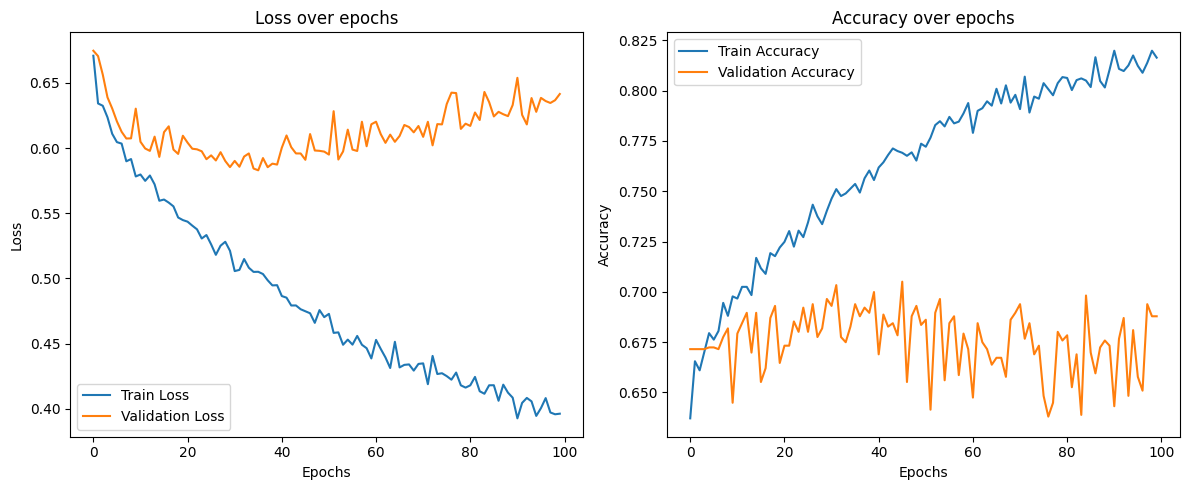

In [9]:
import numpy as np
import mne
from mne import concatenate_raws
from mne.datasets import eegbci
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Input, Conv2D, DepthwiseConv2D, SeparableConv2D, BatchNormalization,
                                     Activation, AveragePooling2D, Dropout, Flatten, Dense)
from collections import Counter
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

# Parameters
IMAGINE_LEFT_RIGHT = [4, 8, 12]
subjects = range(1, 110)
selected_channels = ['C3..', 'C4..', 'Fp1.', 'Fp2.', 'F7..', 'F3..', 'F4..', 'F8..',
                     'T7..', 'T8..', 'P7..', 'P3..', 'P4..', 'P8..', 'O1..', 'O2..']

# Load raw data paths
physionet_paths = np.concatenate([
    eegbci.load_data(subj, IMAGINE_LEFT_RIGHT, path="/content/drive/MyDrive/Colab Notebooks/mne_data")
    for subj in subjects
])

# Read Raw objects
raws = [
    mne.io.read_raw_edf(p, preload=True, stim_channel='auto', verbose='WARNING')
    for p in physionet_paths
]

# Check original sampling frequencies
sfreqs = np.unique([r.info['sfreq'] for r in raws])
print("Original sampling freqs:", sfreqs)

# Resample all raws to the lowest frequency
target_sfreq = int(sfreqs.min())
for r in raws:
    r.resample(target_sfreq, npad='auto')
print(f"Resampled all raws to {target_sfreq} Hz")

# Concatenate
raw = concatenate_raws(raws)

# Band-pass filter
raw.filter(8., 30., fir_design='firwin', verbose=False)

# Pick only selected channels
raw.pick_channels(selected_channels)

# Extract epochs (T1 = left, T2 = right)
events, _ = mne.events_from_annotations(raw)
event_id = dict(T1=1, T2=2)
eeg_picks = mne.pick_types(raw.info, eeg=True, exclude='bads')
epochs = mne.Epochs(raw, events, event_id=event_id, tmin=1, tmax=4.1,
                    proj=False, picks=eeg_picks, baseline=None,
                    preload=True, verbose=False)

# Prepare data (in µV) and labels
X = (epochs.get_data() * 1e6).astype(np.float32)
y = epochs.events[:, -1] - 1  # zero-indexed labels

# Normalize each trial per channel
X_reshaped = X.reshape(X.shape[0], X.shape[1], -1)
X_norm = np.zeros_like(X_reshaped)
for i in range(X.shape[0]):
    X_norm[i] = StandardScaler().fit_transform(X_reshaped[i].T).T
X = X_norm.reshape(X.shape)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Debug prints
print(f"Total trials: {X.shape[0]}")
print(f"Train trials: {X_train.shape[0]}, Test trials: {X_test.shape[0]}")
steps_per_epoch = np.ceil(X_train.shape[0] * 0.8 / 64)
print(f"Expected batches per epoch: {steps_per_epoch}")
print("Labels balance (train):", Counter(y_train))
print("Labels balance (test):", Counter(y_test))

# Reshape for EEGNet
X_train = X_train.transpose(0, 1, 2)[..., np.newaxis]
X_test = X_test.transpose(0, 1, 2)[..., np.newaxis]

# EEGNet model definition
def EEGNet(nb_classes, Chans, Samples, dropoutRate=0.5,
           kernLength=64, F1=16, D=4, F2=64):
    input_main = Input(shape=(Chans, Samples, 1))
    # Block 1
    block1 = Conv2D(F1, (1, kernLength), padding='same', use_bias=False)(input_main)
    block1 = BatchNormalization()(block1)
    block1 = DepthwiseConv2D((Chans, 1), use_bias=False, depth_multiplier=D)(block1)
    block1 = BatchNormalization()(block1)
    block1 = Activation('elu')(block1)
    block1 = AveragePooling2D((1, 4))(block1)
    block1 = Dropout(dropoutRate)(block1)

    # Block 2
    block2 = SeparableConv2D(F2, (1, 16), padding='same', use_bias=False)(block1)
    block2 = BatchNormalization()(block2)
    block2 = Activation('elu')(block2)
    block2 = AveragePooling2D((1, 8))(block2)
    block2 = Dropout(dropoutRate)(block2)

    flatten = Flatten()(block2)
    dense = Dense(nb_classes, activation='softmax')(flatten)
    return Model(inputs=input_main, outputs=dense)

# Instantiate and compile
model = EEGNet(nb_classes=2, Chans=X_train.shape[1], Samples=X_train.shape[2])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Train
history = model.fit(
    X_train, y_train,
    batch_size=64,
    epochs=100,
    validation_split=0.2,
    verbose=1
)

# Evaluation
y_pred = model.predict(X_test).argmax(axis=-1)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Test Accuracy: {acc:.4f}, F1 Score: {f1:.4f}")

# Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


# Modelo usando spectograma

In [ ]:
import os
import numpy as np
import mne
from mne import concatenate_raws
from mne.datasets import eegbci
from scipy.signal import stft
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Concatenate
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

# Diretório de espectrogramas (sem logging)
spectrogram_dir = r"C:\Users\Chari\OneDrive\Documentos\GitHub\teste01\spectrograms"
os.makedirs(spectrogram_dir, exist_ok=True)

# Parâmetros gerais
IMAGINE_LEFT_RIGHT = [4, 8, 12]
subjects = range(1, 21)
selected_channels = ['C3..', 'C4..', 'Fp1.', 'Fp2.', 'F7..', 'F3..', 'F4..', 'F8..',
                     'T7..', 'T8..', 'P7..', 'P3..', 'P4..', 'P8..', 'O1..', 'O2..']

# Carregamento dos dados
physionet_paths = np.concatenate([
    eegbci.load_data(subj, IMAGINE_LEFT_RIGHT, path=r"C:\Users\Chari\OneDrive\Documentos\GitHub\teste01\mne_data") for subj in subjects
])
raws = [mne.io.read_raw_edf(p, preload=True, stim_channel='auto', verbose='WARNING') for p in physionet_paths]
raw = concatenate_raws(raws)
raw.filter(8., 30., fir_design='firwin', verbose=False)
raw.pick_channels(selected_channels)

# Eventos e epochs
events, _ = mne.events_from_annotations(raw)
event_id = dict(T1=1, T2=2)
epochs = mne.Epochs(raw, events, event_id=event_id, tmin=1, tmax=4.1, baseline=None, preload=True, verbose=False)

# Função de geração de espectrograma
def generate_spectrogram(trial, fs=250, window='hann', nperseg=64, noverlap=50):
    f, t, Zxx = stft(trial, fs=fs, window=window, nperseg=nperseg, noverlap=noverlap)
    mu_band = (f >= 8) & (f <= 14)
    beta_band = (f >= 16) & (f <= 30)
    spec_mu = np.abs(Zxx[mu_band, :])
    spec_beta = np.abs(Zxx[beta_band, :])
    spec_mu = np.resize(spec_mu, (20, 32))
    spec_beta = np.resize(spec_beta, (20, 32))
    return np.concatenate((spec_mu, spec_beta), axis=0)

# Geração de espectrogramas e labels
X, y = [], []
for i, (epoch, label) in enumerate(zip(epochs.get_data(), epochs.events[:, -1] - 1)):
    combined_spec = []
    for ch_idx, ch_data in enumerate(epoch):
        spec = generate_spectrogram(ch_data)
        combined_spec.append(spec)
    full_image = np.stack(combined_spec, axis=-1)  # shape (40, 32, 16)
    X.append(full_image)
    y.append(label)

X = np.array(X, dtype=np.float32)
y = np.array(y)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# CNN ajustada para 16 canais

def build_model(input_shape=(40, 32, 16), num_classes=2):
    inp = Input(shape=input_shape)
    x1 = Conv2D(32, (3, 3), activation='relu', padding='same')(inp)
    x2 = Conv2D(32, (3, 3), activation='relu', padding='same')(x1)
    x3 = Concatenate()([x1, x2])
    x4 = MaxPooling2D((2, 2))(x3)
    x5 = Conv2D(64, (3, 3), activation='relu', padding='same')(x4)
    x6 = Flatten()(x5)
    x6 = Dropout(0.5)(x6)
    out = Dense(num_classes, activation='softmax')(x6)
    return Model(inputs=inp, outputs=out)

# Treinamento do modelo
model = build_model()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Avaliação
y_pred = model.predict(X_test).argmax(axis=-1)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}, F1 Score: {f1_score(y_test, y_pred):.4f}")

In [ ]:
import os
import numpy as np
import mne
from scipy.signal import stft
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Concatenate
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

# Diretório dos arquivos GDF do BCI IV 2b
data_path = 'BCICIV_2b_gdf'
subjects = ['B01', 'B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B08', 'B09']
sessions = ['01T']  # Apenas sessões de treino

raw_list = []
for subj in subjects:
    for sess in sessions:
        file_path = os.path.join(data_path, f'{subj}{sess}.gdf')
        print(f"Verificando: {file_path}")
        if os.path.exists(file_path):
            try:
                raw = mne.io.read_raw_gdf(file_path, preload=True, stim_channel=None, verbose='ERROR')
                raw.pick_channels(['C3', 'Cz', 'C4'])
                raw.filter(8., 30., fir_design='firwin', verbose=False)
                raw_list.append(raw)
            except Exception as e:
                print(f"Erro ao ler {file_path} com MNE: {e}")
        else:
            print(f"Arquivo não encontrado: {file_path}")

if not raw_list:
    raise RuntimeError("Nenhum arquivo GDF foi carregado com MNE. Verifique os dados.")

raw = mne.concatenate_raws(raw_list)
events, _ = mne.events_from_annotations(raw)
event_id = {'Left Hand': 1, 'Right Hand': 2}
epochs = mne.Epochs(raw, events, event_id=event_id, tmin=3.0, tmax=7.0,
                    baseline=None, preload=True, verbose=False)

fs = int(raw.info['sfreq'])
X, y = [], []
for epoch, label in zip(epochs.get_data(), epochs.events[:, -1]):
    spec = []
    for ch_data in epoch:
        f, t, Zxx = stft(ch_data, fs=fs, nperseg=64, noverlap=32)
        mu_band = (f >= 8) & (f <= 14)
        beta_band = (f >= 16) & (f <= 30)
        spec_mu = np.abs(Zxx[mu_band, :])
        spec_beta = np.abs(Zxx[beta_band, :])
        spec_mu = np.resize(spec_mu, (20, 32))
        spec_beta = np.resize(spec_beta, (20, 32))
        spec_combined = np.concatenate((spec_mu, spec_beta), axis=0)
        spec.append(spec_combined)
    X.append(np.stack(spec, axis=-1))
    y.append(label - 1)

X = np.array(X, dtype=np.float32)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def build_model(input_shape=(40, 32, 3), num_classes=2):
    inp = Input(shape=input_shape)
    x1 = Conv2D(32, (3, 3), activation='relu', padding='same')(inp)
    x2 = Conv2D(32, (3, 3), activation='relu', padding='same')(x1)
    x3 = Concatenate()([x1, x2])
    x4 = MaxPooling2D((2, 2))(x3)
    x5 = Conv2D(64, (3, 3), activation='relu', padding='same')(x4)
    x6 = Flatten()(x5)
    x6 = Dropout(0.5)(x6)
    out = Dense(num_classes, activation='softmax')(x6)
    return Model(inputs=inp, outputs=out)

model = build_model(input_shape=X_train.shape[1:], num_classes=2)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

model.fit(X_train, y_train, epochs=5, batch_size=16, validation_split=0.2)
y_pred = model.predict(X_test).argmax(axis=-1)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}, F1 Score: {f1_score(y_test, y_pred):.4f}")